# Выполнил: Филоненко Никита Дмитриевич

-----

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Мы устанавливаем сиды для генератора случайных чисел, тем самым определяя последовательность псевдослучайных чисел, которые будут сгенерированы. Благодаря этому, последовательность сгенерированных случайных чисел будет одинаковой при каждом запуске программы`

Это нужно для того, чтобы:

- сделать работу со случайными последовательностями чисел предсказуемой и управляемой
- в контексте ML, обеспечить одинаковую выборку данных для различных алгоритмов, чтобы корректно можно было их сравнивать между собой
- улучшить процесс откладки, поскольку при новом тестировании (запуске программы) последовательность чисел будет одинаковой

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv', sep=',')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv', sep=',')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [4]:
value_null = df_train.isna().sum()
value_columns = value_null[value_null > 0].index.tolist()

print("Колонки с пропущенными значениями:\n")
for column in value_columns:
    print(f'{column}: {value_null[column]}')

Колонки с пропущенными значениями:

mileage: 202
engine: 202
max_power: 196
torque: 203
seats: 202


In [5]:
duplicated_count = df_train.duplicated().sum()
print(f'Кол-во явных дубликатов: {duplicated_count}')

Кол-во явных дубликатов: 985


- Выведем дубликаты

In [6]:
df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

- Построим дашборд с использованием `ydata_profiling`

In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Выводы по основным характеристикам датафрейма df_train (по построенному дашборду):**

Основные:

- кол-во признаков: 13
- кол-во объектов (строк): 6999
- кол-во пропущенных ячеек в таблице: 1005 (это 1.1%)
- датафрейм содержит 4 числовых признака, 4 категориальных и 5 obj (text)
- полагаю 5 признаков (name, mileage, engine, max_power, torque) он идентифицировал как obj (text) из-за большой вариативности: distinct в среднем достигает >395
- mileage, max_power, torque вообще должны быть числами, нужно привести их к нужному data type

Отдельно по каждому признаку:

- `name` (text, obj)
    - кол-во уникальных значений: 1924
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%


- `year` (int)
    - кол-во уникальных значений: 29
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%
    - mean: 2013.8184
    - minimum: 1983
    - maximum: 2020


- `selling_price` (int)
    - кол-во уникальных значений: 637
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%
    - mean: 639515.2
    - minimum: 29999
    - maximum: 10000000


- `km_driven` (int)
    - кол-во уникальных значений: 827
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%
    - mean: 69584.616
    - minimum: 1
    - maximum: 2360457


- `fuel` (categorical)
    - кол-во уникальных значений: 4
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%
    - дисбаланс классов (Diesel: 3793, Petrol: 3120, CNG: 52, LPG: 34)

- `seller_type` (categorical)
    - кол-во уникальных значений: 3
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%
    - дисбаланс классов (Individual: 5826, Dealer: 967, Trustmark Dealer: 206)


- `transmission` (categorical)
    - кол-во уникальных значений: 2
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%
    - дисбаланс классов (Manual: 6095, Automatic: 904)


- `owner` (categorical)
    - кол-во уникальных значений: 5
    - кол-во пропусков: 0
    - пропусков в процентах: 0.0%


- `mileage` (text, obj)
    - кол-во уникальных значений: 386
    - кол-во пропусков: 202
    - пропусков в процентах: 2.9%


- `engine` (text, obj)
    - кол-во уникальных значений: 120
    - кол-во пропусков: 202
    - пропусков в процентах: 2.9%


- `max_power` (text, obj)
    - кол-во уникальных значений: 316
    - кол-во пропусков: 196
    - пропусков в процентах: 2.8%


- `torque` (text, obj)
    - кол-во уникальных значений: 419
    - кол-во пропусков: 203
    - пропусков в процентах: 2.9%


- `seats` (int)
    - кол-во уникальных значений: 9
    - кол-во пропусков: 202
    - пропусков в процентах: 2.9%
    - mean: 5.4190084
    - minimum: 2
    - maximum: 14

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

1. **Для трейна:**

- описательные (числовые) статистики:

In [8]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

- основные категориальные статистики:

In [9]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

2. **Для теста:**

- описательные (числовые) статистики:

In [10]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

- основные категориальные статистики:

In [11]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

**Анализ описательной статистики по числовым признакам:**

`year`:

- **в трейне** разница между медианой и средним крайне мала, выбросов не наблюдается, распределение симметрично 
- **в тесте** разница между медианой и средним еще меньше, чем в трейне. Выбросы отсутствуют, распределение симметрично
- тестовый набор данных более однородный, поскольку разница между средним и медианой практически близка к нулю, также распределение более симметричное, выбросы отсутствуют

`selling_price`:

- **в трейне** среднее ощутимо больше медианы, явно есть выбросы (в распределении могут быть экстремально высокие значения), распределение имеет правостороннюю асимметрию 
- **в тесте** тоже среднее ощутимо больше медианы, есть выбросы (в распределении могут быть экстремально высокие значения), распределение имеет правостороннюю асимметрию
- существенной разницы между трейном и тестом нет, оба имеют выбросы (высокие) и правостороннюю асимметрию

`km_driven`:

- **в трейне** среднее больше медианы, есть выбросы (в распределении могут быть высокие значения), распределение имеет правостороннюю асимметрию 
- **в тесте** тоже среднее больше медианы, есть выбросы (в распределении могут быть высокие значения, относительно всего набора данных), распределение имеет правостороннюю асимметрию
- существенной разницы между трейном и тестом нет, оба имеют выбросы (высокие) и правостороннюю асимметрию

`seats`:

- **в трейне** среднее больше медианы, есть выбросы (в распределении могут быть высокие значения), распределение имеет правостороннюю асимметрию 
- **в тесте** тоже среднее больше медианы, есть выбросы (в распределении могут быть высокие значения, относительно всего набора данных), распределение имеет правостороннюю асимметрию
- трейн и тест имеют почти идентичную разницу среднего и медианы, оба имеют выбросы (высокие) и правостороннюю асимметрию

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [12]:
features = df_train.drop(columns=['selling_price'])
print(f"Количество объектов с одинаковым признаковым описанием: {features.duplicated().sum()}")

Количество объектов с одинаковым признаковым описанием: 1159


- Отображаем дубликаты

In [13]:
df_train[features.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

- Удалим дубликаты

In [14]:
df_train.drop_duplicates(subset=features.columns, keep='first', inplace=True)

- Обновим индексы, чтобы убрать пропуски

In [15]:
df_train.reset_index(drop=True, inplace=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [16]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [17]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

- предобработка столбцов 'mileage', 'engine', 'max_power'

In [18]:
df_train[['mileage', 'engine', 'max_power']]

mileage   engine   max_power
0      23.4 kmpl  1248 CC      74 bhp
1     21.14 kmpl  1498 CC  103.52 bhp
2      23.0 kmpl  1396 CC      90 bhp
3      16.1 kmpl  1298 CC    88.2 bhp
4     20.14 kmpl  1197 CC   81.86 bhp
...          ...      ...         ...
5835  17.92 kmpl  1086 CC    62.1 bhp
5836   18.9 kmpl   998 CC    67.1 bhp
5837   18.5 kmpl  1197 CC   82.85 bhp
5838   16.8 kmpl  1493 CC     110 bhp
5839   19.3 kmpl  1248 CC    73.9 bhp

[5840 rows x 3 columns]

In [19]:
import re

def clean_features_int(value):
    if pd.isna(value):
        return None
    else:
        match = re.search(r'(\d+\.?\d*)', value)
        return float(match.group(1)) if match else np.nan

units = ['mileage', 'engine', 'max_power']

for unit in units:
    df_train.loc[:, unit] = df_train[unit].apply(lambda x: clean_features_int(x))
    df_test.loc[:, unit] = df_test[unit].apply(lambda x: clean_features_int(x))
    
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].astype(float)
print(df_train[['mileage', 'engine', 'max_power']].dtypes)
df_train[['mileage', 'engine', 'max_power']]

mileage      float64
engine       float64
max_power    float64
dtype: object


mileage  engine  max_power
0       23.40  1248.0      74.00
1       21.14  1498.0     103.52
2       23.00  1396.0      90.00
3       16.10  1298.0      88.20
4       20.14  1197.0      81.86
...       ...     ...        ...
5835    17.92  1086.0      62.10
5836    18.90   998.0      67.10
5837    18.50  1197.0      82.85
5838    16.80  1493.0     110.00
5839    19.30  1248.0      73.90

[5840 rows x 3 columns]

**предобработка столбца 'torque'**

- Сначала извлечем числовое значение крутящего момента через регулярку
- извлечем единицу измерения крутящего момента
- конвертируем kgm в Nm для стандартизации столбца torque (1 Ньютон-метр `1 kgm` составляет = 9.80665 Nm)
- извлечем обороты rpm, если это диапазон между, то берем среднее значение этого диапазона
- результатом будет два новых столбца torque (крутящий момент в Ньютон-метрах) и max_torque_rpm (максимальные обороты)


In [20]:
df_train['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

In [21]:
def preprocess_torque(df_value: str) -> pd.Series:
    df_value = df_value.lower()
    df_value = re.sub(r'[,\(\)]', '', df_value)
    
    match = re.search(r'(\d+\.?\d*)\s*(kgm|nm)?\s*(?:@|at|)\s*(\d{1,4}(?:-\d{1,4})?)\s*(?:rpm)?', df_value)
    if match:
        df_torque_value = float(match.group(1))
        
        if 'kgm' in df_value and 'nm' not in df_value:
            df_torque_value = df_torque_value * 9.80665
        
        rpm_value_str = match.group(3)
        if '-' in rpm_value_str:
            rpm_value_str = rpm_value_str.split('-')
            max_rpm = (float(rpm_value_str[0]) + float(rpm_value_str[1])) / 2
        else:
            max_rpm = float(rpm_value_str)
        
        max_rpm = float(f"{max_rpm:.2f}")
        df_torque_value = float(f"{df_torque_value:.2f}")
        
        return pd.Series([df_torque_value, max_rpm])
    else:
        return pd.Series([None, None])

In [22]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: preprocess_torque(str(x)))
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: preprocess_torque(str(x)))

In [23]:
print(df_train[['torque', 'max_torque_rpm']].dtypes)
df_train[['torque', 'max_torque_rpm']]

torque            float64
max_torque_rpm    float64
dtype: object


torque  max_torque_rpm
0     190.00          2000.0
1     250.00          2000.0
2     219.67          2250.0
3     112.78          4500.0
4     113.75          4000.0
...      ...             ...
5835   96.10          3000.0
5836   90.00          3500.0
5837  113.70          4000.0
5838  235.36          2325.0
5839  190.00          2000.0

[5840 rows x 2 columns]

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






- заполним пропуски в столбцах медианами

In [24]:
columns = df_train.columns[df_train.isnull().any()]

for column in columns:
    median_value = df_train[column].median()
    df_train[column] = df_train[column].fillna(median_value)
    df_test[column] = df_test[column].fillna(median_value)

assert df_train.isnull().sum().sum() == 0
assert df_test.isnull().sum().sum() == 0

C:\Users\nikdf\AppData\Local\Temp\ipykernel_13548\1601091867.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[column] = df_test[column].fillna(median_value)
C:\Users\nikdf\AppData\Local\Temp\ipykernel_13548\1601091867.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[column] = df_test[column].fillna(median_value)
C:\Users\nikdf\AppData\Local\Temp\ipykernel_13548\1601091867.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=F

`использование медианы в качестве способа заполнения пропусков является наиболее предпочтительным вариантом, поскольку:`


- устойчива к выбросам (значения, сильно отличающиеся от остальных, не искажают медиану)
- лучше отражает "типичное" значение для асимметричных данных

среднее же, напротив чувствительно к выбросам и, если есть экстремальные значения, среднее значение будет искажено искажено и не отражать полное представление о данных

`Как правильно считать медиану для заполнения?`

верный подход - по тренировочным данным для `train` и `test`, поскольку:

- медиана, рассчитанная на тренировочной выборке, отражает распределение данных, на котором обучается модель
- если медианы вычисляются по тестовому набору, это нарушает принцип изоляции тестового набора, а также приводит к несоответствию данных и может ухудшить результаты модели

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [25]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

df_train[['engine', 'seats']].dtypes, df_test[['engine', 'seats']].dtypes

(engine    int64
 seats     int64
 dtype: object,
 engine    int64
 seats     int64
 dtype: object)

- почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

`Столбец seats содержит дискретные значения, то есть кол-во мест в автомобиле ограничено небольшим набором значений (а не непрерывной величиной). Также значения seats могут быть осмыслены не как числа, а как категории, например: двухместные машины (спорткары), семейные машины (5-местные), минивэны (7-местные) и тд`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [26]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   174.884401     5.426712     2841.127312  
std      31.640418   107.167793     0.982344      950.125914  
min       0.000000    21.000000     2.000000        0.000000  
25%      68.000000   111.800000     5.000000     2000.000000  
50%      81.860000   160.000000     5.000000     2400.000000  
75%      99.000000   200.000000     5.000000     3750.000000  
max     400.000000  1863.260000    14.000000     5000.000000

In [27]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        torque        seats  max_torque_rpm  
count  1000.000000   1000.000000  1000.000000     1000.000000  
mean     90.841670    187.006640     5.403000     2885.991000  
std      34.893389    357.750828     0.912921      971.962288  
min      34.200000     40.000000     4.000000        0.000000  
25%      69.000000    111.275000     5.000000     2125.000000  
50%      82.425000    160.000000     5.000000     2400.000000  
75%     102.000000    205.000000     5.000000     4000.000000  
max     280.000000  11011.200000     9.000000     5000.000000

`Да, заполнение пропусков медианой изменяет распределения, особенно если данные изначально имели сильный дисбаланс`

то есть:

- если большая часть данных концентрировалась на одних значениях, а пропуски случайно попадали в другие диапазоны, заполнение медианой сдвинет данные к наиболее частым значениям
- также столбцы с большими выбросами особенно чувствительны к замене пропусков

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seaborn`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [28]:
%matplotlib inline

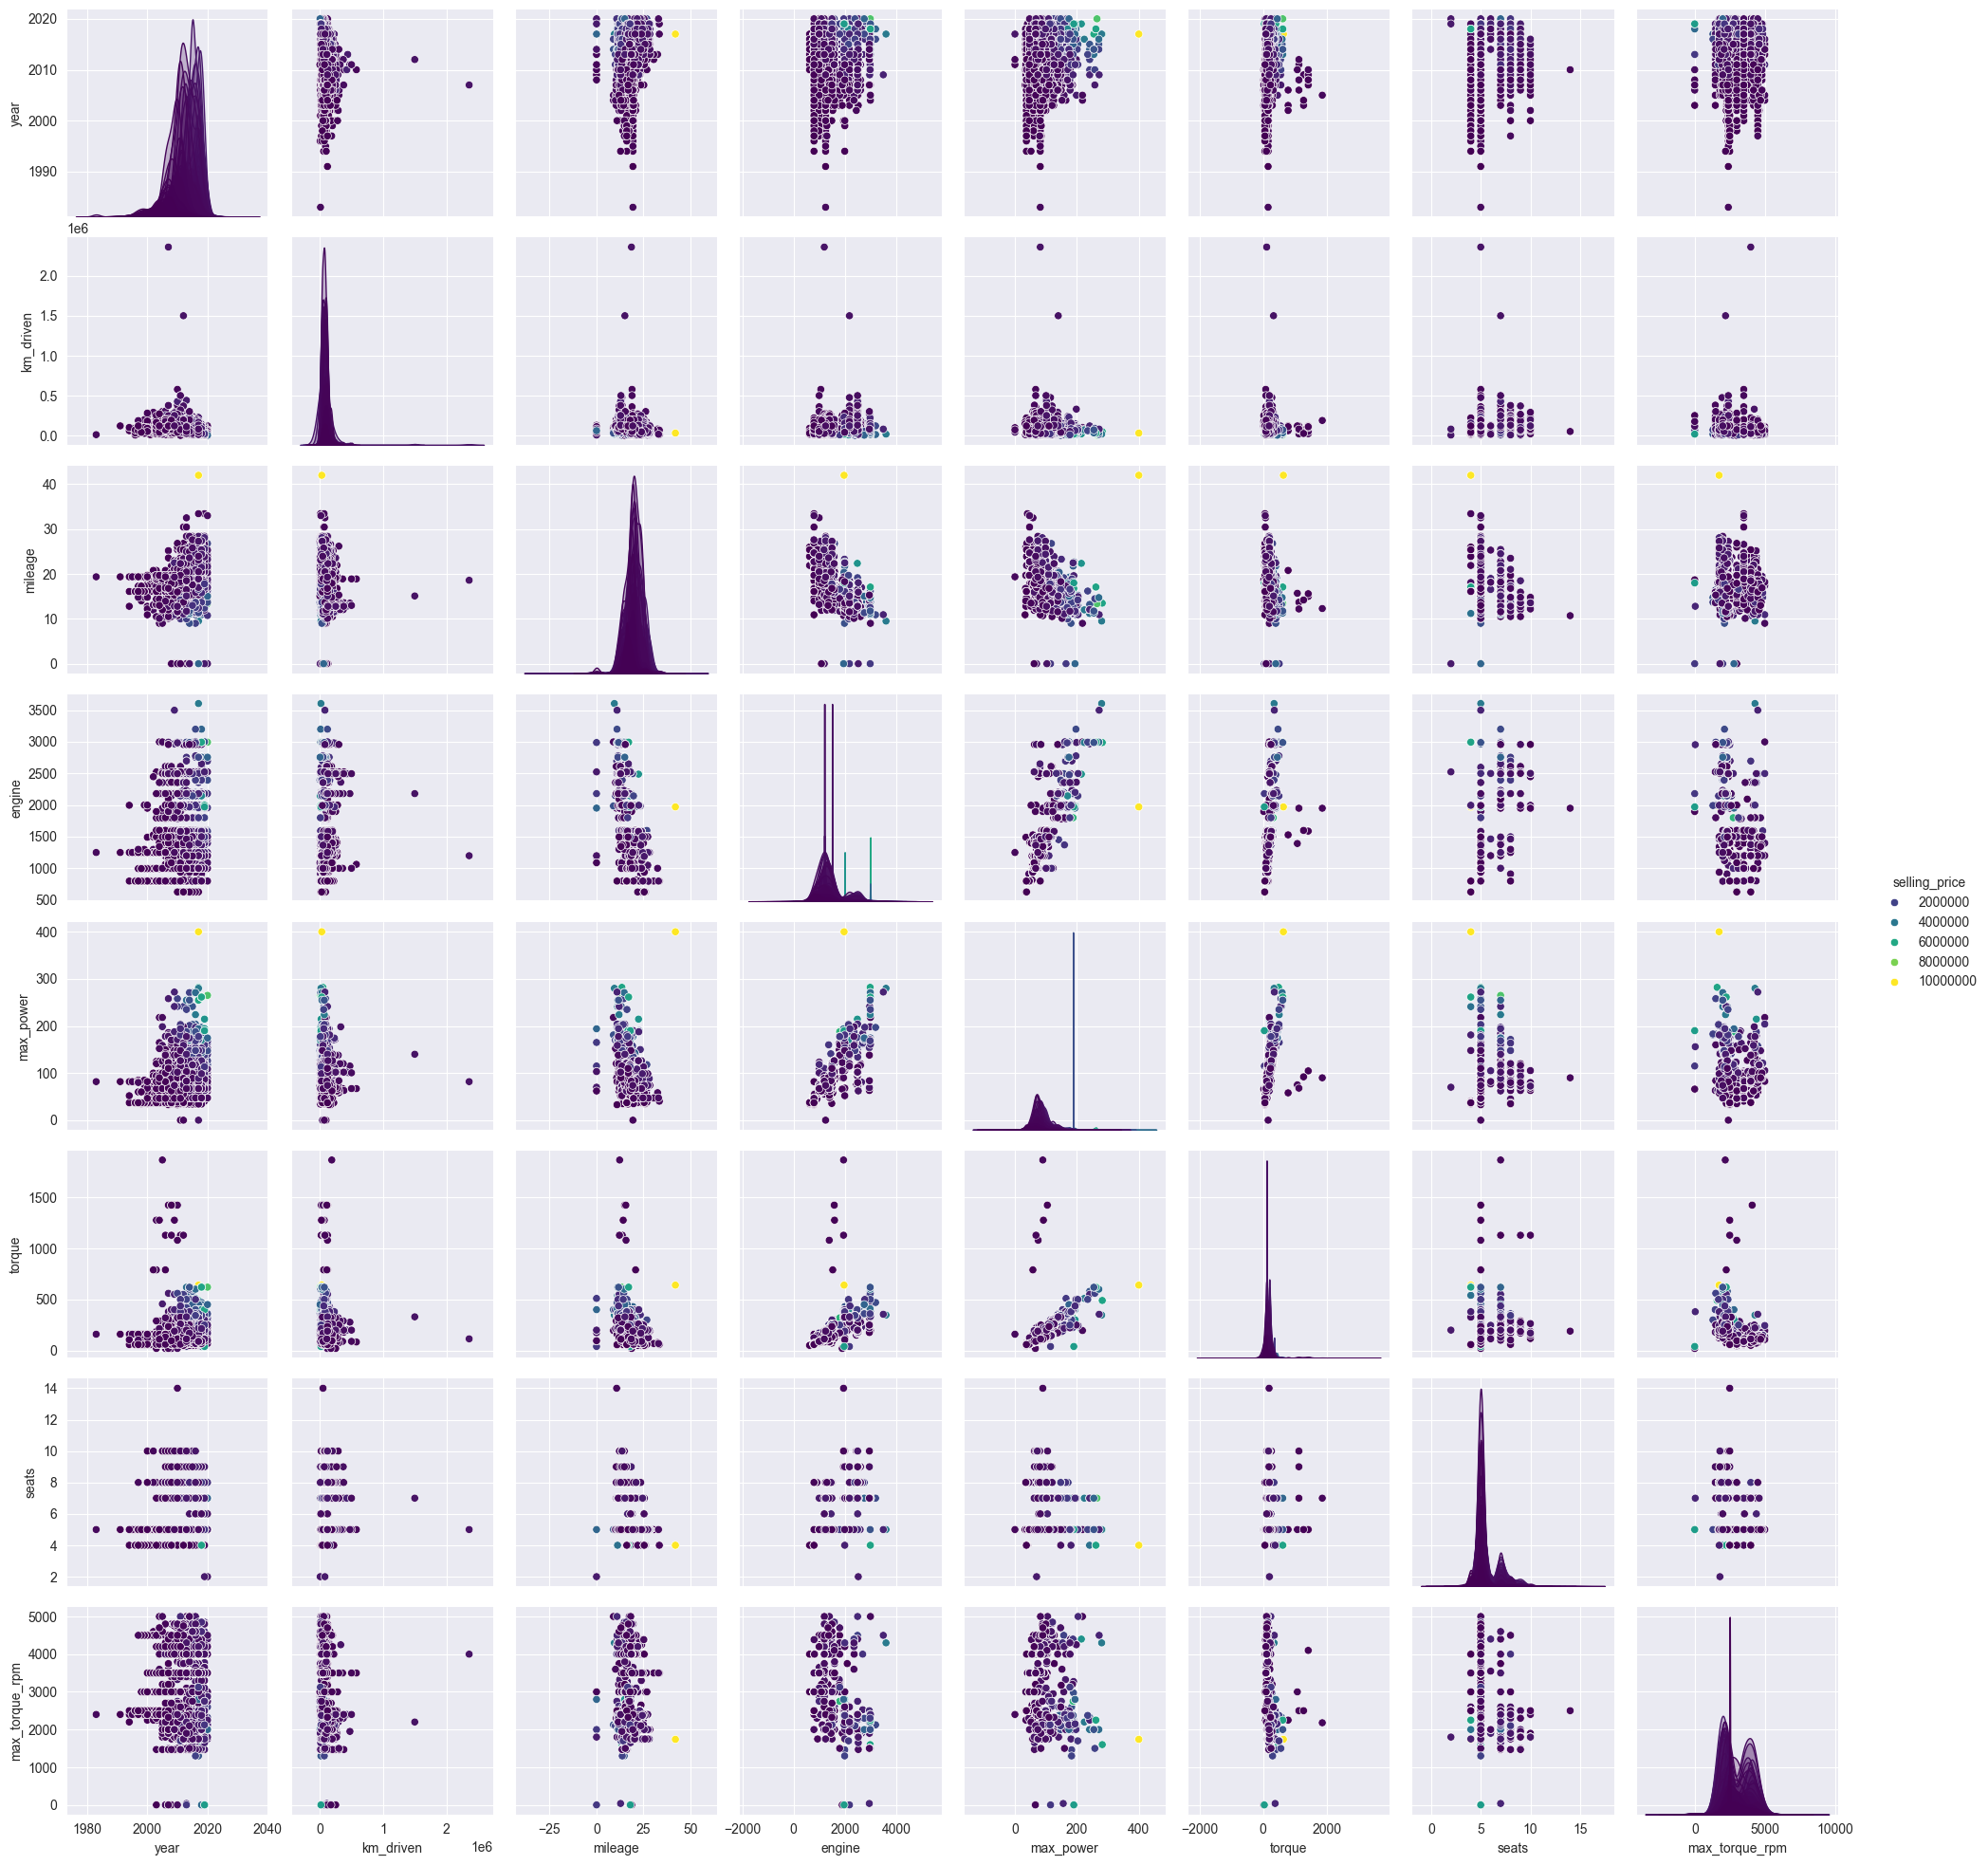

In [29]:
sns.pairplot(df_train, diag_kind='kde', hue='selling_price', palette='viridis')
plt.show()

- Можно ли предположить на основе распределений связь признаков с целевой переменной?

некоторые признаки имеют видимые закономерности, указывающие на связь с целевой переменной selling_price, например: km_driven связано с более низкими ценами (старые машины с высоким пробегом стоят дешевле), max_power связана с более высокими ценами, seats в категории автомобилей с большим числом мест (например, 7 и более) цены могут быть выше


- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?


max_power и torque (Мощность и крутящий момент, связаны друг с другом)

year и km_driven (у старых автомобилей пробег выше)

max_torque_rpm и max_power (оба показателя связаны с характеристиками двигателя)

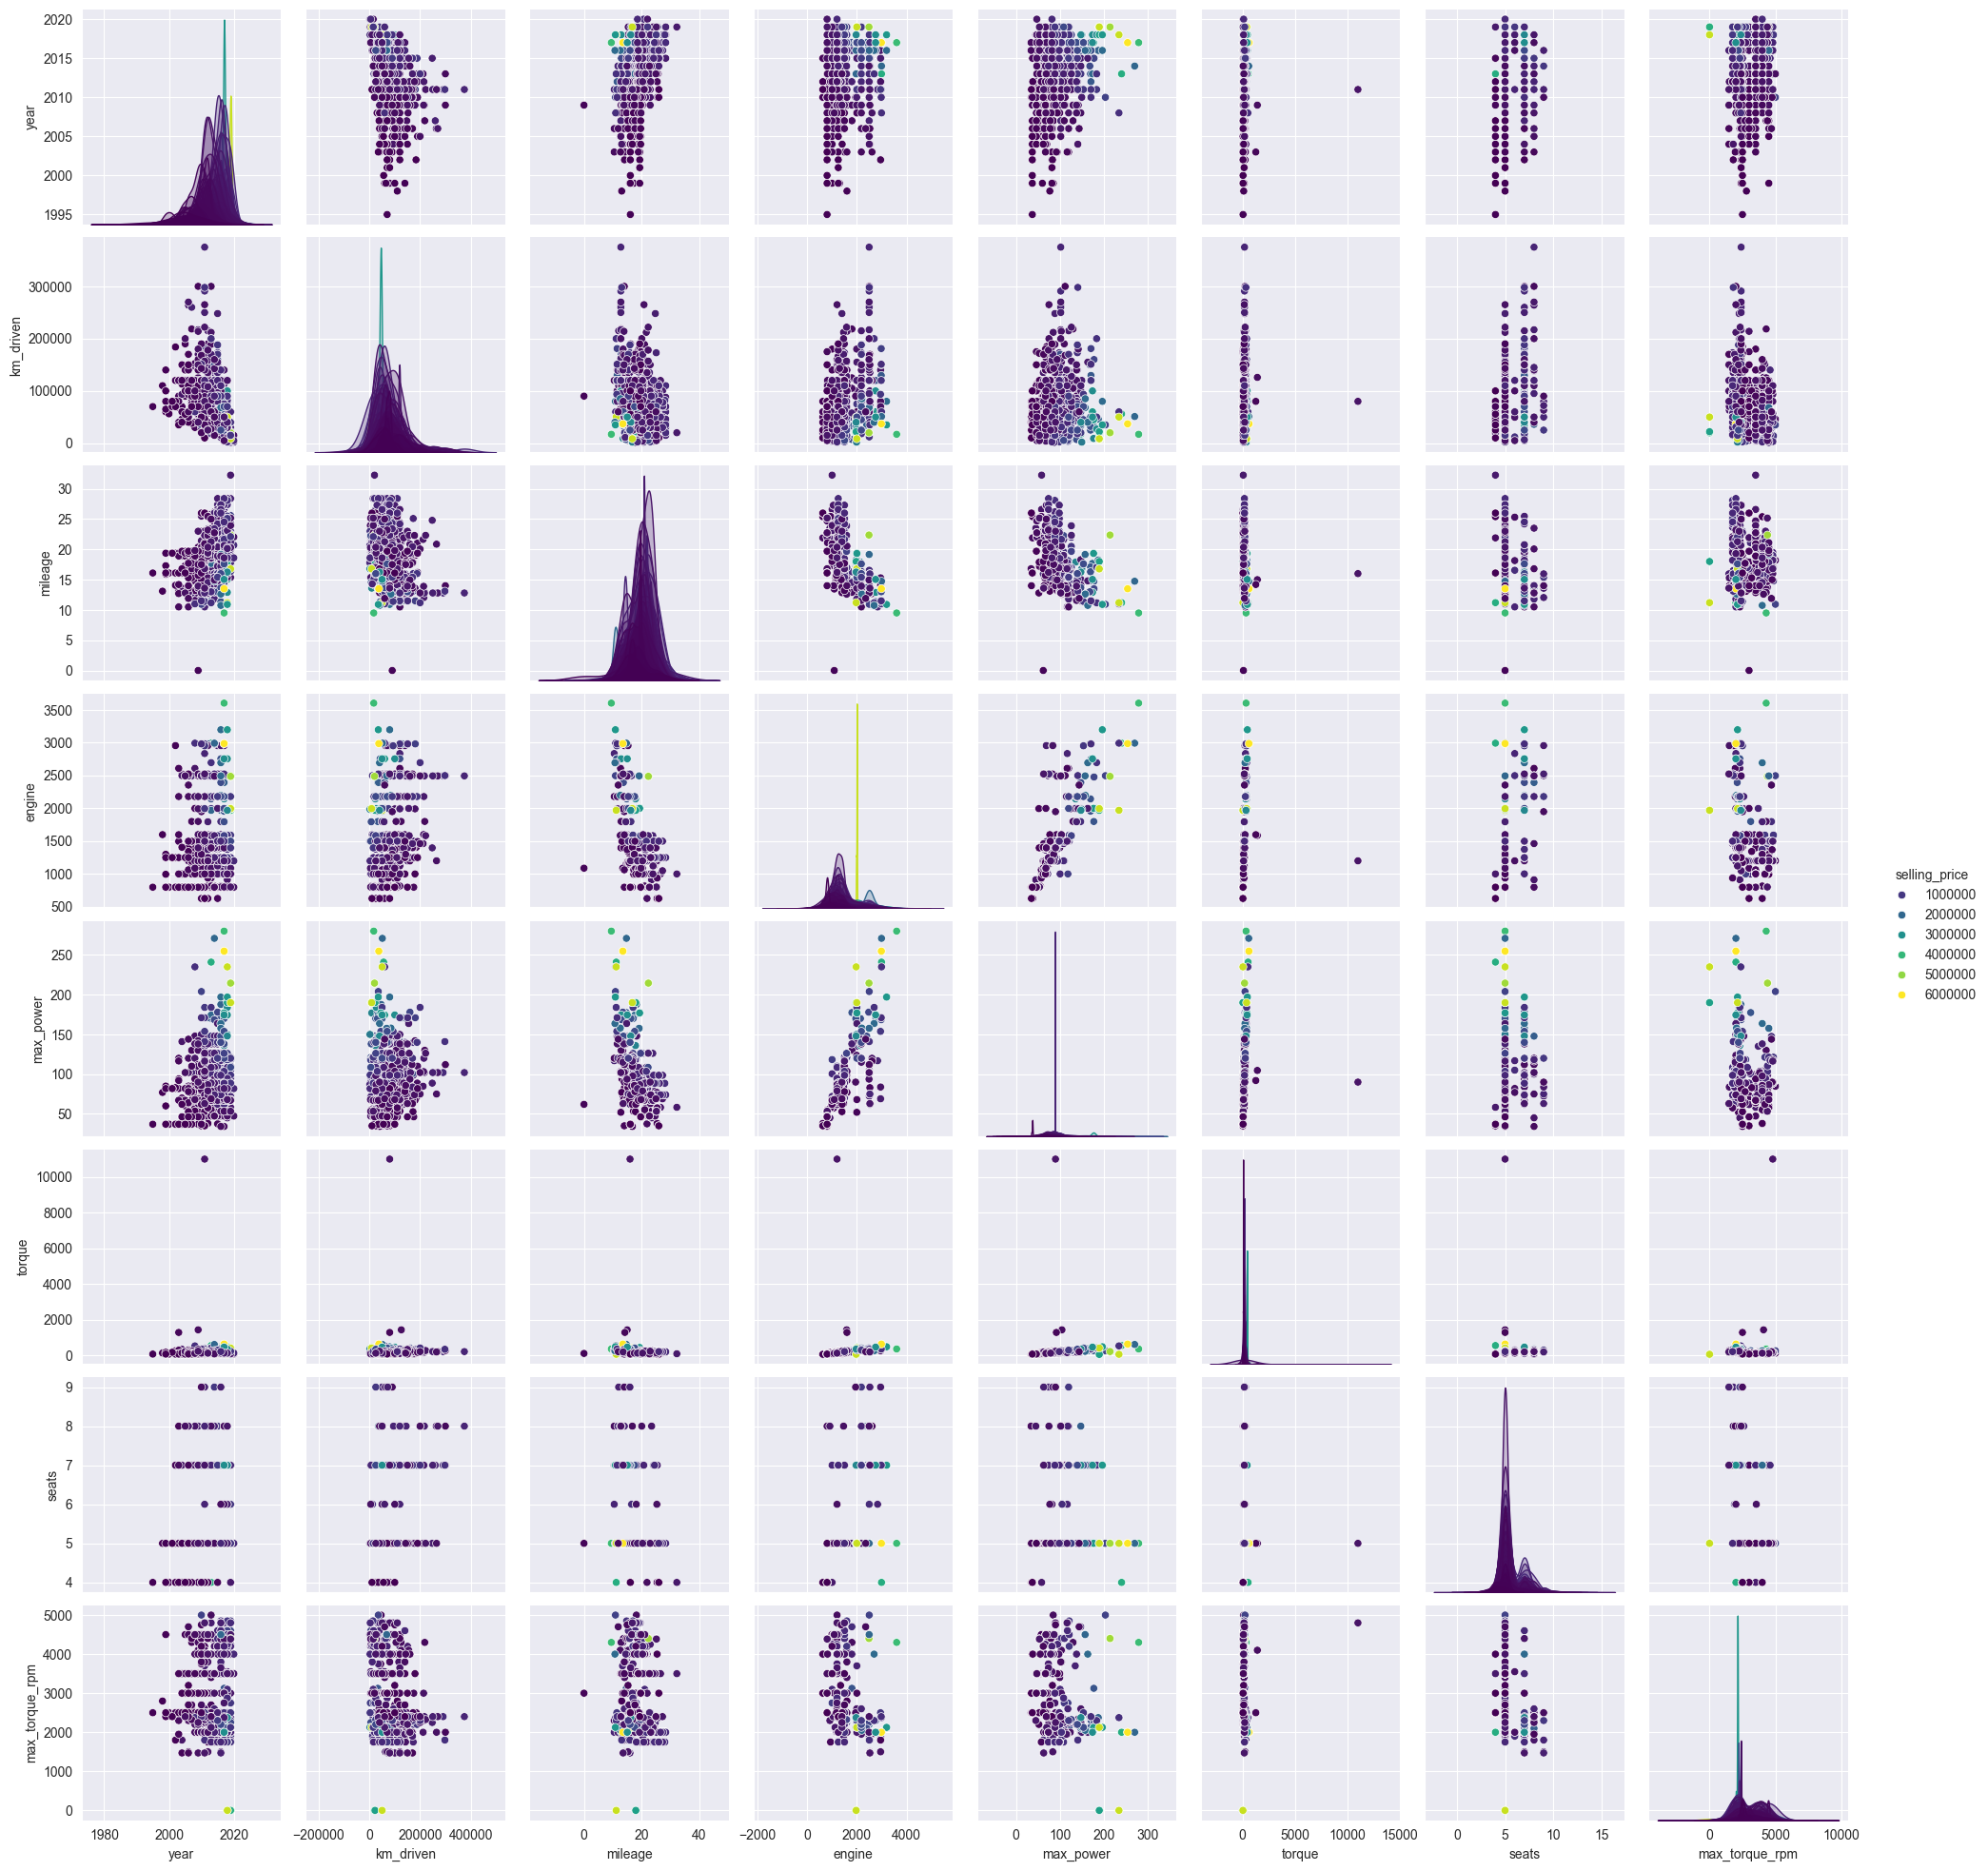

In [30]:
sns.pairplot(df_test, diag_kind='kde', hue='selling_price', palette='viridis')
plt.show()

- тестовые данные имеют меньше наблюдений с крайними outliers, в нем менее выражены экстремально высокие значения для таких признаков, как mileage или max_torque_rpm

- зависимость между km_driven и selling_price наблюдается и в тестовых данных

- взаимосвязи между max_power и torque, а также year и km_driven, которые были заметны в тренировочном наборе, тоже есть в тестовом


На первый взгляд, данные train и test имеют схожую структуру (что в целом позволяет утверждать корректное разбиение и схожесть совокупностей)

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [35]:
df_train_numeric = df_train.select_dtypes(include='number')
pearson_value = df_train_numeric.corr(method='pearson')
pearson_value

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.054384       0.454387   0.111723 -0.233755  0.595107   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.043493      -0.189180  -0.247630 -0.082464 -0.404945   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.054384  0.041178        0.043493  
selling_price    0.692814  0.454387  0.149953       -0.189180  
km_driven        0.024588  0.111723  0.192328       -0.247630  
mileage         -0.373390 -0.233755 -0.451059       -0.082464  
engine           0.681117  0.595107  0.652172       -0.404945  
max_power        1.000000  0.655230  0.244112       -0.165263  
torque           0.655230  1.000000  0.318126       -0.426453  
seats            0.244112  0.318126  1.000000       -0.309111  
max_torque_rpm  -0.165263 -0.426453 -0.309111        1.000000

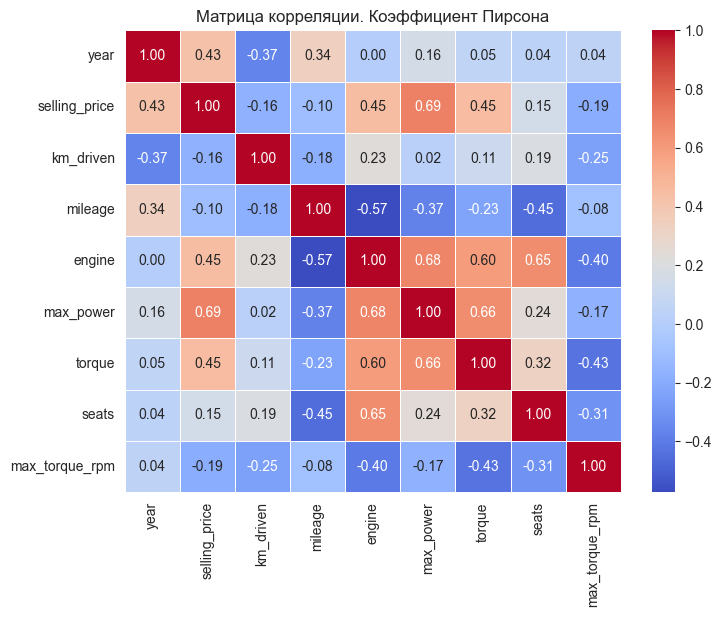

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_value, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции. Коэффициент Пирсона')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. `Наименее скоррелированными признаками являются year и engine, max_power и km_driven, year и max_torque_rpm. Коэффициент корреляции между ними равен 0.0, 0.02, 0.04, что указывает на очень слабую линейную зависимость.`


2. `Сильная положительная линейная зависимость наблюдается между признаками:`
- selling_price и max_power (коэффициент корреляции 0.69)
- engine и seats (коэффициент корреляции 0.65)
- max_power и torque (коэффициент корреляции 0.66)
- max_power и engine (коэффициент корреляции 0.68)
- selling_price и engine (коэффициент корреляции 0.45)

3. `Нет, чем меньше год, тем, скорее всего, меньше километров проехала машина к дате продажи. Коэффициент корреляции между year и km_driven равен -0.37, что указывает на умеренную отрицательную корреляцию.`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [48]:
def spearman_corr_dataframe(df):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype='float64')
    
    for col1 in df.columns:
        for col2 in df.columns:
            rank_col1 = np.argsort(np.argsort(df[col1].values))
            rank_col2 = np.argsort(np.argsort(df[col2].values))
            d = rank_col1 - rank_col2
            d_squared_sum = np.sum(d**2)

            n = len(df)
            rho = 1 - (6 * d_squared_sum) / (n * (n**2 - 1))
            corr_matrix.loc[col1, col2] = rho
    return corr_matrix

In [50]:
matrix_spearman = spearman_corr_dataframe(df_train_numeric)
matrix_spearman

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705000  -0.567515  0.344084 -0.038890   
selling_price   0.705000       1.000000  -0.295361  0.026304  0.462853   
km_driven      -0.567515      -0.295361   1.000000 -0.199209  0.302392   
mileage         0.344084       0.026304  -0.199209  1.000000 -0.427873   
engine         -0.038890       0.462853   0.302392 -0.427873  1.000000   
max_power       0.165512       0.611666   0.040921 -0.308598  0.710989   
torque          0.103753       0.580197   0.240471 -0.158366  0.831572   
seats           0.020476       0.214398   0.160072 -0.303668  0.375382   
max_torque_rpm  0.003584      -0.257851  -0.310073 -0.150820 -0.471951   

                max_power    torque     seats  max_torque_rpm  
year             0.165512  0.103753  0.020476        0.003584  
selling_price    0.611666  0.580197  0.214398       -0.257851  
km_driven        0.040921  0.240471  0.160072       -0.310073  
mileage         -0.308598 -0.158366 -0.303668       -0.150820  
engine           0.710989  0.831572  0.375382       -0.471951  
max_power        1.000000  0.778052  0.222314       -0.154895  
torque           0.778052  1.000000  0.322765       -0.642882  
seats            0.222314  0.322765  1.000000       -0.222658  
max_torque_rpm  -0.154895 -0.642882 -0.222658        1.000000

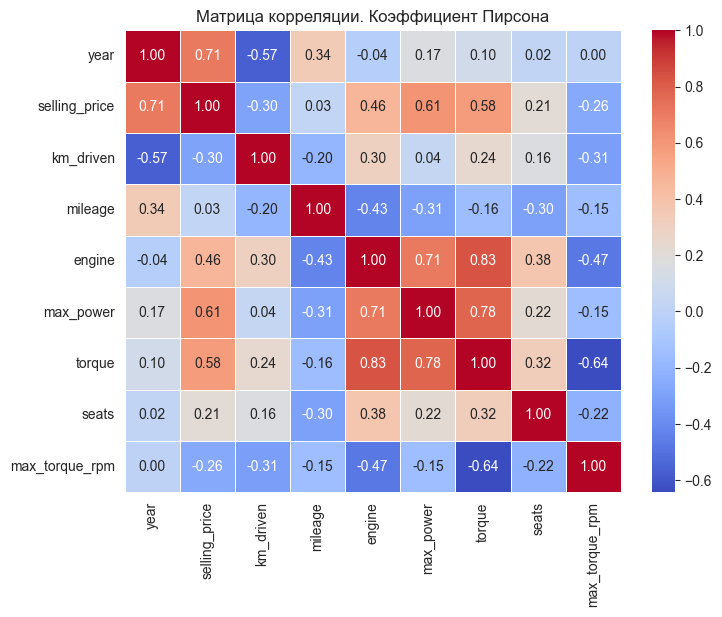

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции. Коэффициент Пирсона')
plt.show()

`Значительные различия наблюдаются в значениях корреляции между year и selling_price, year и km_driven, year и engine, year и torque, year и seats, year и max_torque_rpm. Небольшие различия наблюдаются в значениях корреляции между year и max_power. Совпадение наблюдается в значении корреляции между year и mileage.`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

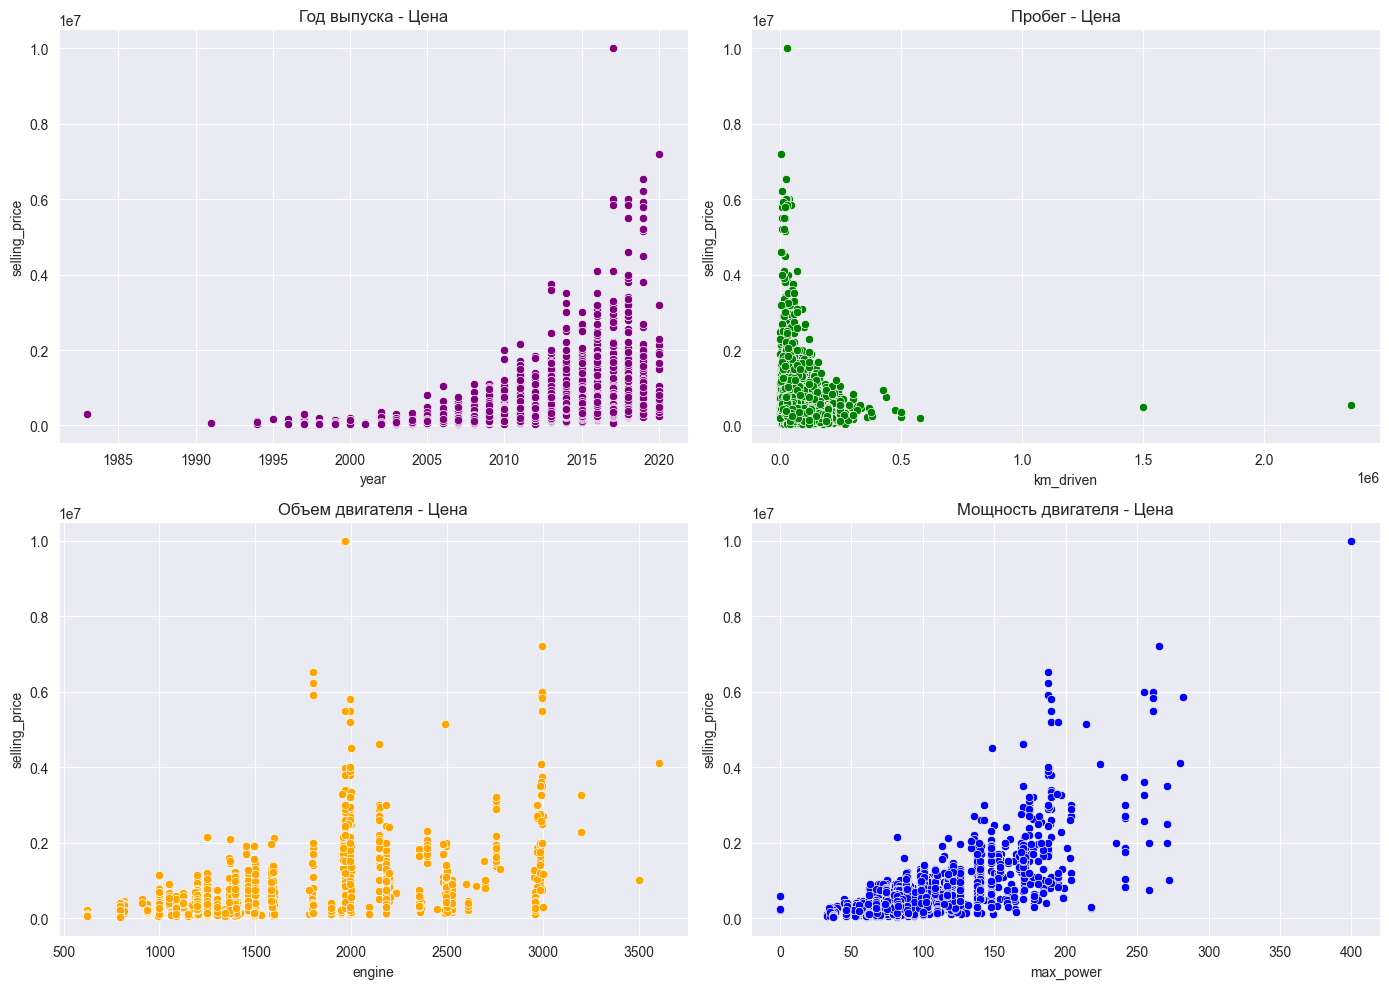

In [53]:
plt.figure(figsize=(14, 10))

# selling_price и year
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_train_numeric['year'], y=df_train_numeric['selling_price'], color='purple')
plt.title('Год выпуска - Цена')

# selling_price и km_driven
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_train_numeric['km_driven'], y=df_train_numeric['selling_price'], color='green')
plt.title('Пробег - Цена')

# selling_price и engine
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_train_numeric['engine'], y=df_train_numeric['selling_price'], color='orange')
plt.title('Объем двигателя - Цена')

# selling_price и max_power
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_train_numeric['max_power'], y=df_train_numeric['selling_price'], color='blue')
plt.title('Мощность двигателя - Цена')

plt.tight_layout()
plt.show()

1. Год выпуска - Цена

На диаграмме показан, как цена автомобиля зависит от года его выпуска (линейная зависимость)


2. Пробег автомобиля - Цена

На диаграмме показан, как цена автомобиля изменяется в зависимости от его пробега (сколько километров он проехал)


3. Объем двигателя - Цена

На диаграмме показан, как объем двигателя (по оси X) влияет на цену автомобиля (по оси Y)


4. Мощность двигателя - Цена

На диаграмме показан, как мощность двигателя (по оси X) соотносится с ценой автомобиля (по оси Y)

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [57]:
df_train_numbers = df_train.select_dtypes(include='number') 

y_train = df_train['selling_price']
X_train = df_train_numbers.drop(['selling_price'], axis=1)

y_train.shape, X_train.shape

((5840,), (5840, 8))

In [59]:
df_train_numbers.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm'],
      dtype='object')

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_test = df_test['selling_price']
X_test = # your code here

y_test.shape, X_test.shape

In [ ]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, root_mean_squared_error as RMSE

def train_linear_regression_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()

    model.fit(X=X_train, y=y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = MSE(y_train, y_train_pred)
    rmse_train = RMSE(y_train, y_train_pred)
    r2_score_train = r2_score(y_train, y_train_pred)

    mse_test = MSE(y_test, y_test_pred)
    rmse_test = RMSE(y_test, y_test_pred)
    r2_score_test = r2_score(y_test, y_test_pred)

    return mse_train, rmse_train, r2_score_train, mse_test, rmse_test, r2_score_test, model, y_train_pred, y_test_pred

In [ ]:
mse_train_1, rmse_train_1, r2_score_train_1, mse_test_1, rmse_test_1, r2_score_test_1, model_1, y_train_pred_1, y_test_pred_1 = train_linear_regression_model(X_train=X_train_scale_clean, X_test=X_test_scale, y_train=y_train_clean, y_test=y_test)

print(f'MSE Train: {mse_train_1:.3f}\nRMSE Train: {rmse_train_1:.3f}\nR2 Train: {r2_score_train_1:.3f}\n\n')
print(f'MSE Test: {mse_test_1:.3f}\nRMSE Test: {rmse_test_1:.3f}\nR2 Test: {r2_score_train_1:.3f}')

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [ ]:
def r2_custom(y_true, y_pred):
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.average(y_true, axis=0)) ** 2))
    return r2

`R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [ ]:
# your code here

`Your answer here`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# your code here

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# your code here

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

# your code here

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
# your code here

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 11)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>